In [1]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
# 28 * 28 images are flattened and stored as an array of 784 pixel values
mnist.train.images.shape

(55000, 784)

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.images.shape

(10000, 784)

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
mnist.train.images[200].shape

(784,)

In [10]:
mnist.train.images[200].min()

0.0

In [11]:
mnist.train.images[200].max()

1.0

### Visualizing the Data

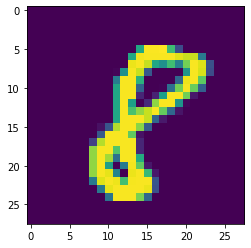

In [12]:
plt.imshow(mnist.train.images[7400].reshape(28,28))

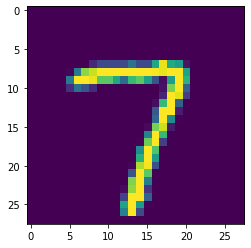

In [13]:
plt.imshow(mnist.train.images[100].reshape(28,28))

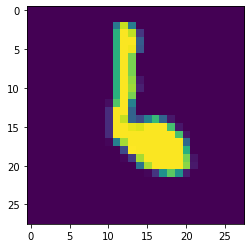

In [14]:
plt.imshow(mnist.train.images[600].reshape(28,28))

In [15]:
batch_x, batch_y = mnist.train.next_batch(200)

In [16]:
batch_x.shape

(200, 784)

In [17]:
batch_y.shape

(200, 10)

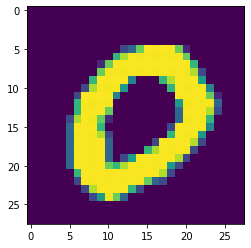

In [18]:
plt.imshow(batch_x[131].reshape(28,28))

In [19]:
batch_y[131]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
batch_y[131].argmax()

0

### Create the Model

In [21]:
# placeholder to read and feed images at run time
x = tf.placeholder(tf.float32, shape = [None, 784])

# placeholder to feed the labels at run time
y = tf.placeholder(tf.float32, shape = [None, 10])

In [22]:
# weight and bias - layer1

weight1 = tf.Variable(tf.truncated_normal([784,200], stddev = 0.1))
bias1 = tf.Variable(tf.truncated_normal([200], stddev = 0.1))

# input function
netinput1 = tf.add(tf.matmul(x, weight1), bias1)

# activation function
output1 = tf.nn.relu(netinput1)

In [23]:
# weight and bias - layer2

weight2 = tf.Variable(tf.truncated_normal([200,100], stddev = 0.1))
bias2 = tf.Variable(tf.truncated_normal([100], stddev = 0.1))

# input function
netinput2 = tf.add(tf.matmul(output1, weight2), bias2)

# activation function
output2 = tf.nn.relu(netinput2)

In [24]:
# weight and bias - layer3

weight3 = tf.Variable(tf.truncated_normal([100,60], stddev = 0.1))
bias3 = tf.Variable(tf.truncated_normal([60], stddev = 0.1))

# input function
netinput3 = tf.add(tf.matmul(output2, weight3), bias3)

# activation function
output3 = tf.nn.relu(netinput3)

In [25]:
# weight and bias - layer4

weight4 = tf.Variable(tf.truncated_normal([60,30], stddev = 0.1))
bias4 = tf.Variable(tf.truncated_normal([30], stddev = 0.1))

# input function
netinput4 = tf.add(tf.matmul(output3, weight4), bias4)

# activation function
output4 = tf.nn.relu(netinput4)

In [26]:
# weight and bias - layer5

weight5 = tf.Variable(tf.truncated_normal([30,10], stddev = 0.1))
bias5 = tf.Variable(tf.truncated_normal([10], stddev = 0.1))

# input function
netinput5 = tf.add(tf.matmul(output4, weight5), bias5)

# activation function
output5 = tf.nn.softmax(netinput5)

In [27]:
# defining the perceptron ends here
# this section is for training the perceptron

individual_loss = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = output5)
loss = tf.reduce_mean(individual_loss)

gdo = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train = gdo.minimize(loss)

In [28]:
# initialize the variables
init = tf.global_variables_initializer()

In [29]:
# create a session
sess = tf.Session()
sess.run(init)

In [30]:
for i in range(16000):
    batch_x1, batch_y1 = mnist.train.next_batch(100)
    sess.run(train, feed_dict = {x: batch_x1, y: batch_y1})

In [31]:
# inference - predict
# execute the output in a session

predict = sess.run(output5, feed_dict = {x: mnist.test.images})
predict

array([[0.00000000e+00, 3.80733398e-23, 0.00000000e+00, ...,
        1.00000000e+00, 0.00000000e+00, 8.42441803e-37],
       [1.06000027e-31, 3.03856466e-38, 1.00000000e+00, ...,
        2.85945819e-31, 3.83757641e-30, 0.00000000e+00],
       [3.22954860e-19, 1.00000000e+00, 1.54500843e-20, ...,
        1.17184843e-12, 2.30709586e-18, 8.90571051e-35],
       ...,
       [1.64241746e-32, 1.34887775e-33, 2.41727389e-31, ...,
        3.37065030e-25, 4.26090512e-31, 1.21280106e-37],
       [2.45762696e-31, 0.00000000e+00, 0.00000000e+00, ...,
        3.43768386e-31, 1.86937997e-22, 6.02438071e-30],
       [2.22204803e-27, 1.53166261e-37, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], dtype=float32)

In [32]:
result = sess.run(tf.argmax(predict, axis = 1)) # argmax will give the predicted value in terms of a number
result

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
result.shape

(10000,)

In [34]:
# same way get the label value using argmax
labhot = sess.run(tf.argmax(mnist.test.labels, axis = 1))
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [35]:
accuracy_score(result, labhot) * 100

97.49

In [36]:
confusion_matrix(result, labhot)

array([[ 970,    0,    2,    0,    2,    2,    4,    2,    2,    2],
       [   1, 1115,    3,    0,    0,    0,    2,    1,    1,    1],
       [   1,    2,  993,    2,    1,    0,    0,    7,    3,    1],
       [   1,    3,    3,  970,    0,    2,    0,    2,    4,    3],
       [   0,    0,    6,    0,  961,    2,   12,    1,    3,    9],
       [   0,    1,    1,    8,    0,  869,    6,    0,    1,    3],
       [   3,    2,    4,    0,    3,    6,  929,    0,    0,    0],
       [   3,    3,    7,    5,    1,    1,    0, 1001,    3,    1],
       [   1,    9,   13,    5,    1,    5,    5,    4,  954,    2],
       [   0,    0,    0,   20,   13,    5,    0,   10,    3,  987]],
      dtype=int64)